In [1]:
import tullerutils as tu

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})

note: I'm not sure how to account for the surface area of the columnar structure in determining a kchem. I'm also not sure how thick the columnar structure is, and we still need to use the optical microscope to assess the electrode geometry to estimate the factors needed to calculate the resistivity and therefore the activation energy.

A pore does not conduct. Estimate for reasonably dense films:
Use the porosity to scale the resistivity vs. a 100% dense film (that we've already measured)
Or compare directly across the 100% dense film to estimate the porosity.
Activation energy should be the same.

Troubleshooting things to try:
- Make sure that the intercept frequency is not significantly affected by the PO2 (get full spectra at 0.1 and 0.2), i.e. that we're making a valid choice in a fixed 250Hz measurement during PO2 step.
- Estimate the internal volume of the stage. Check the flush time, consider how this time constant compares to the observed dense film time constants, and expect that the porous samples are faster. Consider shorter gas lines from MFCs to the stage.
- Reconsider dense film measurements in view of the flush time relative to the expected time constant of the film, particularly at higher temperatures.
- Try measuring lower temperatures with the porous film, so that the kinetics are slower. Prof. Tuller says the MTS should be able to go to 10^11 Ohm.
- Re-check that I'm doing the measurements correctly

## Plots of exchange rates

In [3]:
#file = "PCO10_columnar2/pco10_columnar2_exch2_nodrift.csv"
file = "PCO10_columnar1_HanGil/col1_hg_exch.csv"
#file = "PCO10_columnar1/columnar1exch_dark.csv"
cal = tu.stage_to_furnace

df = pd.read_csv(file)
darks = df[df['light'] == False]
lights = df[df['light'] == True]
dark_ox = darks[darks['oxidation'] == True]
dark_re = darks[darks['oxidation'] == False]
light_ox = lights[lights['oxidation'] == True]
light_re = lights[lights['oxidation'] == False]

dark_2 = darks.groupby(['temp C'], as_index=False)[['rate 1/s', 'unc rate 1/s']].mean()
dark_2['t'] = 1 / dark_2['rate 1/s']
dark_2['unc t'] = 1 / (dark_2['rate 1/s']**2) * (dark_2['unc rate 1/s'])

light_2 = lights.groupby(['temp C'], as_index=False)[['rate 1/s', 'unc rate 1/s']].mean()
light_2['t'] = 1 / light_2['rate 1/s']
light_2['unc t'] = 1 / (light_2['rate 1/s']**2) * (light_2['unc rate 1/s'])

def errbar(frame: pd.DataFrame, label=None) -> None:
    plt.errorbar(cal(frame['temp C']), frame['rate 1/s'], yerr=frame['unc rate 1/s'], marker='x', label=label, linestyle='')

def t_errbar(frame: pd.DataFrame, label=None) -> None:
    plt.errorbar(cal(frame['temp C']), frame['t'], yerr=frame['unc t'], marker='x', label=label, linestyle='')
    
def arrhenius_errbar(frame: pd.DataFrame, label=None) -> None:
    plt.errorbar(1000 / (cal(frame['temp C'] + 273)), np.log(frame['rate 1/s']), yerr=frame['unc rate 1/s'], marker='x', label=label, linestyle='')

df['t s'] = 1 / df['rate 1/s']
df['unc t s'] = 1 / (df['rate 1/s']**2) * (df['unc rate 1/s'])
df['cal temp C'] = cal(df['temp C'])
df

,Unnamed: 0,filename,oxidation,light,temp C,rate 1/s,unc rate 1/s,t s,unc t s,cal temp C
0,0,400C_0.1-0.2_200Hz_dark.csv,True,False,400,0.050780,0.015707,19.692932,6.091336,427.568295
1,1,400C_0.1-0.2_200Hz_dark.csv,True,False,400,0.017726,0.003266,56.414114,10.392630,427.568295
2,2,400C_0.1-0.2_200Hz_light.csv,True,True,400,0.044178,0.009150,22.635645,4.688128,427.568295
3,3,400C_0.1-0.2_200Hz_light.csv,True,True,400,0.055689,0.012859,17.956712,4.146209,427.568295
4,4,400C_0.2-0.1_200Hz_dark.csv,False,False,400,0.054342,0.014409,18.401921,4.879437,427.568295
5,5,400C_0.2-0.1_200Hz_dark.csv,False,False,400,0.018359,0.003662,54.467779,10.863390,427.568295
6,6,400C_0.2-0.1_200Hz_light.csv,False,True,400,0.018464,0.003232,54.160378,9.481967,427.568295
7,7,400C_0.2-0.1_200Hz_light.csv,False,True,400,0.037588,0.008313,26.604152,5.883451,427.568295
8,8,425C_0.1-0.2_200Hz_dark.csv,True,False,425,0.061329,0.006819,16.305574,1.813013,454.712955
9,9,425C_0.1-0.2_200Hz_dark.csv,True,False,425,0.074131,0.011225,13.489707,2.042673,454.712955


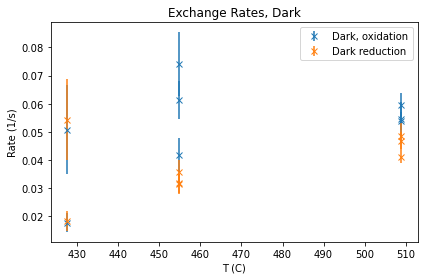

In [7]:
errbar(dark_ox, label='Dark, oxidation')
errbar(dark_re, label='Dark reduction')
plt.title("Exchange Rates, Dark")
plt.xlabel("T (C)")
plt.ylabel("Rate (1/s)")
#plt.text(560, 55, f"$\mu={dark_2['t'].mean():.1f}$s\n$\sigma={dark_2['t'].std():.1f}$s")
plt.legend()
plt.tight_layout()
#plt.savefig("oxvred_dark_flushlimited.png", dpi=150)
plt.show()

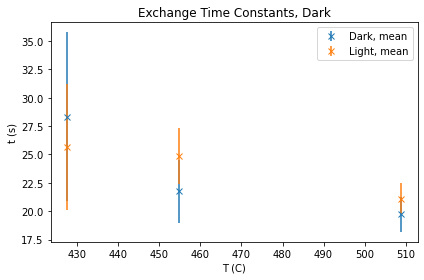

In [5]:
t_errbar(dark_2, label='Dark, mean')
t_errbar(light_2, label='Light, mean')
plt.title("Exchange Time Constants, Dark")
plt.xlabel("T (C)")
plt.ylabel("t (s)")
#plt.text(560, 55, f"$\mu={dark_2['t'].mean():.1f}$s\n$\sigma={dark_2['t'].std():.1f}$s")
plt.legend()
plt.tight_layout()
#plt.savefig("col1_hangil_exch.png", dpi=150)
plt.show()

In [ ]:
arrhenius_errbar(dark_ox, label='Dark oxidation')
arrhenius_errbar(dark_re, label='Dark reduction')
plt.title("Resistance Relaxation Rate, PCO10 Columnar (2)")
plt.xlabel("1000 / T (K)")
plt.ylabel("ln(Arb. Rate) (1/s)")
plt.legend()
plt.show()

## Plots of conductivity

In [7]:
file = "PCO10_columnar1_HanGil/columnar1_HanGil_cond.csv"
cal = tu.stage_to_furnace

df = pd.read_csv(file)
darks = df[df['light'] == False]
lights = df[df['light'] == True]

def plot(frame: pd.DataFrame, label=None) -> None:
    plt.plot(cal(frame['temp C']), frame['R2 Ohm'], marker='x', label=label, linestyle='')
    
def arrhenius_plot(frame: pd.DataFrame, label=None) -> None:
    plt.errorbar(1000 / (cal(frame['temp C']) + 273), np.log(frame['R2 Ohm']), marker='x', label=label, linestyle='')
    
df

,Unnamed: 0,filename,light,temp C,R1 Ohm,R2 Ohm
0,0,350C_0.1atm_dark.csv,False,350,6.835187e+02,4.541772e+07
1,1,350C_0.1atm_light.csv,True,350,2.381606e+04,4.164772e+07
2,2,400C_0.1atm_dark.csv,False,400,4.636369e-07,2.085013e+07
3,3,400C_0.1atm_light.csv,True,400,3.200111e-07,1.928058e+07
4,4,400C_0.2atm_dark.csv,False,400,2.481289e-02,2.106147e+07
5,5,400C_0.2atm_light.csv,True,400,6.117088e-08,1.953519e+07
6,6,425C_0.1atm_dark.csv,False,425,6.242451e-02,1.427663e+07
7,7,425C_0.1atm_light.csv,True,425,3.426970e-02,1.320507e+07
8,8,425C_0.2atm_dark.csv,False,425,3.808126e-04,1.449948e+07
9,9,425C_0.2atm_light.csv,True,425,2.590909e-01,1.348091e+07


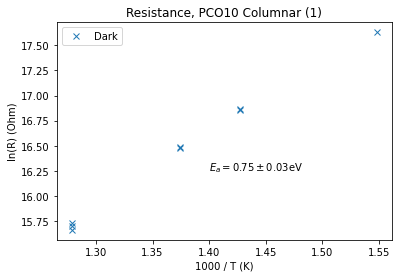

In [10]:
arrhenius_plot(darks, label='Dark')
#arrhenius_plot(lights, label='Light')
plt.title("Resistance, PCO10 Columnar (1)")
plt.xlabel("1000 / T (K)")
plt.ylabel("ln(R) (Ohm)")
# plt.text(1.5, 16.6, "$E_a = 0.58\pm 0.02$eV")
plt.text(1.4, 16.25, "$E_a = 0.75\pm 0.03$eV")
plt.legend()
#plt.savefig("columnar1_hangil_cond.png", dpi=150)
plt.show()

0     373.115405
2     427.568295
4     427.568295
6     454.712955
8     454.712955
10    508.838704
11    508.838704
13    508.838704
Name: temp C, dtype: float64
[[Model]]
    Model(conductivity_corrected)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 82
    # data points      = 8
    # variables        = 2
    chi-square         = 8.5330e-17
    reduced chi-square = 1.4222e-17
    Akaike info crit   = -308.635553
    Bayesian info crit = -308.476670
    R-squared          = 0.99588042
[[Variables]]
    E:  0.74510395 +/- 0.02432479 (3.26%) (init = 1)
    A:  7.54365926 +/- 2.76885412 (36.70%) (init = 100)
[[Correlations]] (unreported correlations are < 0.100)
    C(E, A) = 0.999


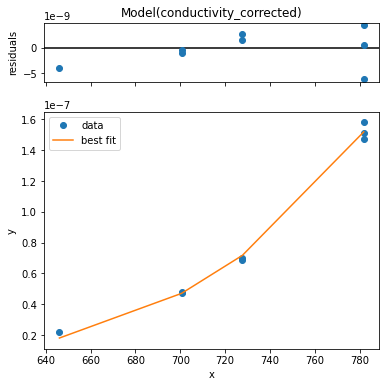

In [8]:
dark_conductivity = 1/darks['R2 Ohm']
model, pars = tu.make_conductivity_model(1.0, temperature_correction=True)
res = model.fit(dark_conductivity, x=(cal(darks['temp C']) + 273), params=pars)
print(cal(darks['temp C']))
res.plot()
print(res.fit_report())